<a href="https://colab.research.google.com/github/georgeputhean/pop-performance/blob/main/POP_Performance_Cleaning_Data_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment = None 

import seaborn as sns
sns.set() 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Matched Data filterered.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'Grade_x', 'School Name', 'School Year_x', 'Notes',
       'Tangerine Test ID', 'Student Number', 'Student Test Number',
       'Date of Test', 'Control or Treatment?', 'Pre or Post?',
       'EGRA Section 1a Score', 'EGRA Section 1b Score',
       'EGRA Section 1c Score', 'EGRA Section 2a Score',
       'EGRA Section 2b Score', 'EGRA Section 3 Letters Correct',
       'EGRA Section 3 Time Completed', 'EGRA Section 3 LPM',
       'EGRA Section 4 Words Correct', 'EGRA Section 4 Time Completed',
       'EGRA Section 4: WPM', 'EGRA Section 5 Words Correct',
       'EGRA Section 5 Time Completed', 'EGRA Section 5 CWPM',
       'EGRA Section 5 Questions Correct',
       'EGRA Section 6 Written Words Correct',
       'EGRA Section 6 Correct Space/Direction',
       'EGRA Section 6 Correct Punctuation',
       'EGRA Section 6 Correct Use of Capitals', 'EGRA Section 7a Score',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Rea

In [ ]:
df=df[df['Select_Row']==True]

In [ ]:
df1=df.drop(['School Name','Unnamed: 0','Notes','Tangerine Test ID','Student Number', 'Student Test Number','Skill to Improve 1 Notes','Skill to Improve 2 Notes','Skill to Improve 3 Notes',
              'Teacher Number: Full Name','Skill to Improve 3','Recommended Next Steps', 'What Went Well?', 'Second Teacher Present','Control or Treatment?',
       'School: School Name','Teacher Class Number', 'Teacher Assessment Number', 'Question 1', 'Question 2','Question 3','Question 4','Question 5','Question 6','Question 7','Question 8', 'Grade_y', 'Select_Row'],axis=1)

In [ ]:
df_target=df1.filter(like='EGRA Section')

In [ ]:
df_x = df1[df1.columns.drop(list(df.filter(regex='EGRA Section')))]

In [ ]:
len(df_target.columns)

20

In [ ]:
df_x.columns

Index(['Grade_x', 'School Year_x', 'Date of Test', 'Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 'Class Number',
       'Teacher Number: Teacher Number', 'Date', 'Q1 Rating or Answer',
       'Q2 Rating', 'Q3 Rating or Answer', 'Q4 Rating or Answer',
       'Q5 Rating or Answer', 'Q6 Rating or Answer', 'Q7 Rating', 'Q8 Rating',
       'Skill to Improve 1', 'Skill to Improve 2', 'Minutes Spent Observing',
       'Minutes Spent Coaching', 'Total Score', 'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present', 'Average Students Enrolled', 'School Year_y'],
      dtype='object')

In [ ]:
df_x_clean=df_x

In [ ]:
df_x_clean['Grade_x']=df_x['Grade_x'].str[8:9]

In [ ]:
df_x_clean['Q1 Rating or Answer']

14     NaN
16     NaN
18     NaN
20     NaN
22     NaN
      ... 
989    NaN
991    NaN
993    NaN
995    NaN
997    NaN
Name: Q1 Rating or Answer, Length: 349, dtype: object

In [ ]:
df_x_clean['Q1 Rating or Answer']=df_x['Q1 Rating or Answer'].str[0:1]
df_x_clean['Q2 Rating'] = df_x['Q2 Rating'].str[0:1]
df_x_clean['Q3 Rating or Answer']= df_x['Q3 Rating or Answer'].str[0:1]
df_x_clean['Q4 Rating or Answer']= df_x['Q4 Rating or Answer'].str[0:1]
df_x_clean['Q5 Rating or Answer']= df_x['Q5 Rating or Answer'].str[0:1]
df_x_clean['Q6 Rating or Answer']= df_x['Q6 Rating or Answer'].str[0:1]
df_x_clean['Q7 Rating']= df_x['Q7 Rating'].str[0:1]
df_x_clean['Q8 Rating']= df_x['Q8 Rating'].str[0:1]

In [ ]:
len(df_x_clean.columns)

31

Set the Rating to None when teacher not present

In [ ]:
df_x_clean[['Q1 Rating or Answer','Q2 Rating','Q3 Rating or Answer','Q4 Rating or Answer','Q5 Rating or Answer','Q6 Rating or Answer','Q7 Rating','Q8 Rating']]=df_x_clean[['Q1 Rating or Answer','Q2 Rating','Q3 Rating or Answer','Q4 Rating or Answer','Q5 Rating or Answer','Q6 Rating or Answer','Q7 Rating','Q8 Rating']].fillna(0)

In [ ]:
df_x_clean[df_x_clean['Teacher Present']=='Not Present'].count()

Grade_x                                                    88
School Year_x                                              88
Date of Test                                               88
Pre or Post?                                               88
Main Language Used In Exam                                 88
EGRA Question 1: Reading Habit                             88
EGRA Last Book Read                                        88
Reads With Others                                          88
How Often, ReadsWithOthers                                 88
Student Gender                                             88
Class Number                                               88
Teacher Number: Teacher Number                             88
Date                                                       88
Q1 Rating or Answer                                        88
Q2 Rating                                                  88
Q3 Rating or Answer                                        88
Q4 Ratin

In [ ]:
df_x_clean['Q1 Rating or Answer'].value_counts()

3    139
2    122
0     88
Name: Q1 Rating or Answer, dtype: int64

Minutes mean

In [ ]:
mean_min=df_x_clean[['Minutes Spent Observing','Minutes Spent Coaching']].mean()

In [ ]:
df_x_clean[['Minutes Spent Observing','Minutes Spent Coaching']]=df_x_clean[['Minutes Spent Observing','Minutes Spent Coaching']].fillna(mean_min)

Skills to None

In [ ]:
df_x_clean[['Skill to Improve 1','Skill to Improve 2']]=df_x_clean[['Skill to Improve 1','Skill to Improve 2']].fillna("None")

In [ ]:
df_x_clean[['Main Language Used In Exam']].value_counts()

Main Language Used In Exam
English; Ewe                  245
English                        80
Ewe                            22
dtype: int64

In [ ]:
df_x_clean[['Main Language Used In Exam']]=df_x_clean[['Main Language Used In Exam']].fillna("English; Ewe")

In [ ]:
#ns.pairplot(df1,hue="Pre or Post?")

In [ ]:
df_x_clean.columns

Index(['Grade_x', 'School Year_x', 'Date of Test', 'Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 'Class Number',
       'Teacher Number: Teacher Number', 'Date', 'Q1 Rating or Answer',
       'Q2 Rating', 'Q3 Rating or Answer', 'Q4 Rating or Answer',
       'Q5 Rating or Answer', 'Q6 Rating or Answer', 'Q7 Rating', 'Q8 Rating',
       'Skill to Improve 1', 'Skill to Improve 2', 'Minutes Spent Observing',
       'Minutes Spent Coaching', 'Total Score', 'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present', 'Average Students Enrolled', 'School Year_y'],
      dtype='object')

In [ ]:
df_x_clean.count()

Grade_x                                                    349
School Year_x                                              349
Date of Test                                               349
Pre or Post?                                               349
Main Language Used In Exam                                 349
EGRA Question 1: Reading Habit                             349
EGRA Last Book Read                                        349
Reads With Others                                          349
How Often, ReadsWithOthers                                 349
Student Gender                                             349
Class Number                                               349
Teacher Number: Teacher Number                             349
Date                                                       349
Q1 Rating or Answer                                        349
Q2 Rating                                                  349
Q3 Rating or Answer                                    

In [ ]:
df_x_clean['Teacher Number: School Years in Teacher Support Program']=df_x_clean['Teacher Number: School Years in Teacher Support Program'].str.count('-')

In [ ]:
df_q=df_x_clean.filter(like='Rating')

In [ ]:
df_q = df_q.astype('int')

In [ ]:
# sns.pairplot(df_q)


In [ ]:
df_target['EGRA Section 1 Total Score']=df_target['EGRA Section 1a Score']+df_target['EGRA Section 1b Score']+df_target['EGRA Section 1c Score']
df_target['EGRA Section 6 Total Score']=df_target['EGRA Section 6 Written Words Correct']+df_target['EGRA Section 6 Correct Space/Direction']+df_target['EGRA Section 6 Correct Punctuation']+df_target['EGRA Section 6 Correct Use of Capitals']

In [ ]:
df_target['EGRA Section 3 LPM']=df_target['EGRA Section 3 LPM'].fillna(df_target['EGRA Section 3 LPM'].mean())

In [ ]:
df_target.count()

EGRA Section 1a Score                     349
EGRA Section 1b Score                     349
EGRA Section 1c Score                     349
EGRA Section 2a Score                     349
EGRA Section 2b Score                     349
EGRA Section 3 Letters Correct            349
EGRA Section 3 Time Completed             347
EGRA Section 3 LPM                        349
EGRA Section 4 Words Correct              349
EGRA Section 4 Time Completed             347
EGRA Section 4: WPM                       349
EGRA Section 5 Words Correct              349
EGRA Section 5 Time Completed             347
EGRA Section 5 CWPM                       349
EGRA Section 5 Questions Correct          349
EGRA Section 6 Written Words Correct      349
EGRA Section 6 Correct Space/Direction    349
EGRA Section 6 Correct Punctuation        349
EGRA Section 6 Correct Use of Capitals    349
EGRA Section 7a Score                     349
EGRA Section 1 Total Score                349
EGRA Section 6 Total Score        

In [ ]:
df_target_unique=df_target

In [ ]:
df_target_unique.columns

Index(['EGRA Section 1a Score', 'EGRA Section 1b Score',
       'EGRA Section 1c Score', 'EGRA Section 2a Score',
       'EGRA Section 2b Score', 'EGRA Section 3 Letters Correct',
       'EGRA Section 3 Time Completed', 'EGRA Section 3 LPM',
       'EGRA Section 4 Words Correct', 'EGRA Section 4 Time Completed',
       'EGRA Section 4: WPM', 'EGRA Section 5 Words Correct',
       'EGRA Section 5 Time Completed', 'EGRA Section 5 CWPM',
       'EGRA Section 5 Questions Correct',
       'EGRA Section 6 Written Words Correct',
       'EGRA Section 6 Correct Space/Direction',
       'EGRA Section 6 Correct Punctuation',
       'EGRA Section 6 Correct Use of Capitals', 'EGRA Section 7a Score',
       'EGRA Section 1 Total Score', 'EGRA Section 6 Total Score'],
      dtype='object')

In [ ]:
# plt.figure(figsize=(16, 6))

# sns.heatmap(df_target_unique.corr(),annot=True);


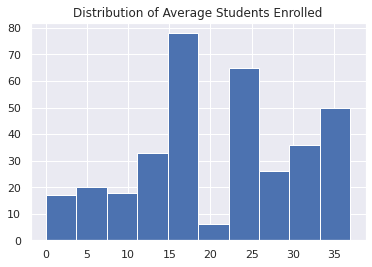

In [ ]:
plt.hist(df_x_clean['Average Students Enrolled'])
plt.title("Distribution of Average Students Enrolled")
plt.show()


In [ ]:
df_target.columns

Index(['EGRA Section 1a Score', 'EGRA Section 1b Score',
       'EGRA Section 1c Score', 'EGRA Section 2a Score',
       'EGRA Section 2b Score', 'EGRA Section 3 Letters Correct',
       'EGRA Section 3 Time Completed', 'EGRA Section 3 LPM',
       'EGRA Section 4 Words Correct', 'EGRA Section 4 Time Completed',
       'EGRA Section 4: WPM', 'EGRA Section 5 Words Correct',
       'EGRA Section 5 Time Completed', 'EGRA Section 5 CWPM',
       'EGRA Section 5 Questions Correct',
       'EGRA Section 6 Written Words Correct',
       'EGRA Section 6 Correct Space/Direction',
       'EGRA Section 6 Correct Punctuation',
       'EGRA Section 6 Correct Use of Capitals', 'EGRA Section 7a Score',
       'EGRA Section 1 Total Score', 'EGRA Section 6 Total Score'],
      dtype='object')

In [ ]:
df_x_clean.columns

Index(['Grade_x', 'School Year_x', 'Date of Test', 'Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 'Class Number',
       'Teacher Number: Teacher Number', 'Date', 'Q1 Rating or Answer',
       'Q2 Rating', 'Q3 Rating or Answer', 'Q4 Rating or Answer',
       'Q5 Rating or Answer', 'Q6 Rating or Answer', 'Q7 Rating', 'Q8 Rating',
       'Skill to Improve 1', 'Skill to Improve 2', 'Minutes Spent Observing',
       'Minutes Spent Coaching', 'Total Score', 'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present', 'Average Students Enrolled', 'School Year_y'],
      dtype='object')

In [ ]:
df_x_clean['How Often, ReadsWithOthers'].astype('category')

14     1
16     1
18     2
20     3
22     1
      ..
989    0
991    3
993    2
995    3
997    0
Name: How Often, ReadsWithOthers, Length: 349, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

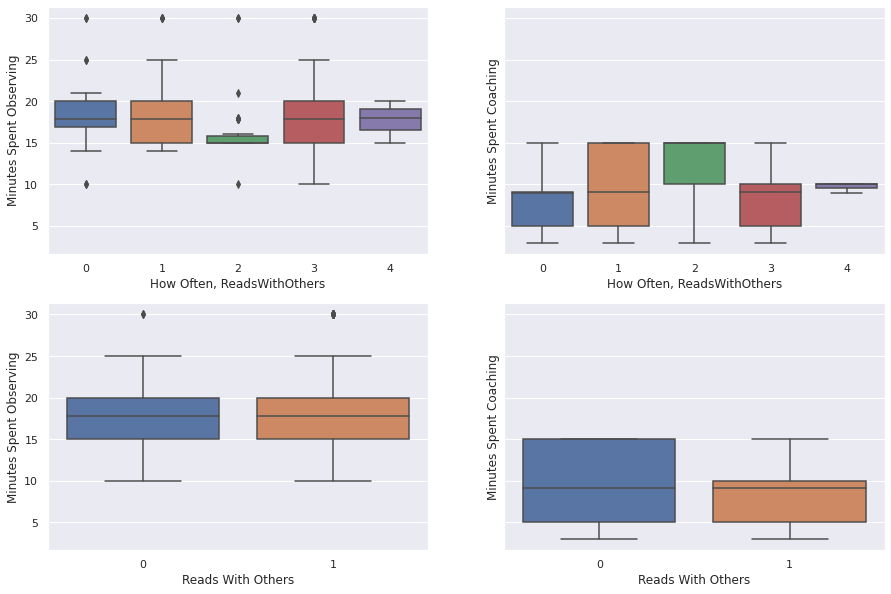

In [ ]:
fig, axes = plt.subplots(figsize=(15,10), nrows=2, ncols=2,sharey=True)

sns.boxplot(x=df_x_clean['How Often, ReadsWithOthers'],y=df_x_clean['Minutes Spent Observing'],ax=axes[0,0])
sns.boxplot(x=df_x_clean['How Often, ReadsWithOthers'],y=df_x_clean['Minutes Spent Coaching'],ax=axes[0,1])
sns.boxplot(x=df_x_clean['Reads With Others'],y=df_x_clean['Minutes Spent Observing'],ax=axes[1,0])
sns.boxplot(x=df_x_clean['Reads With Others'],y=df_x_clean['Minutes Spent Coaching'],ax=axes[1,1])

plt.show()

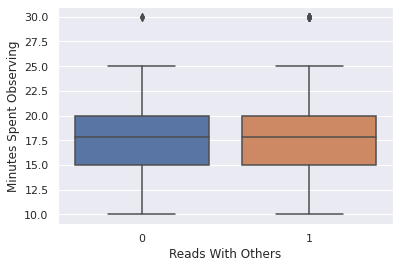

In [ ]:
 sns.boxplot(x=df_x_clean['Reads With Others'],y=df_x_clean['Minutes Spent Observing'])
sns.set(style="darkgrid")


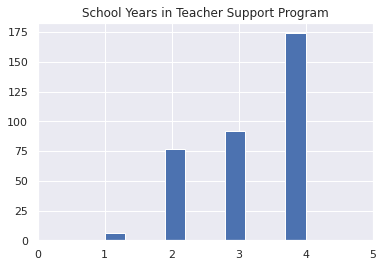

In [ ]:
plt.hist(df_x_clean['Teacher Number: School Years in Teacher Support Program'])
plt.title("School Years in Teacher Support Program")
plt.xticks(range(6))
plt.show()

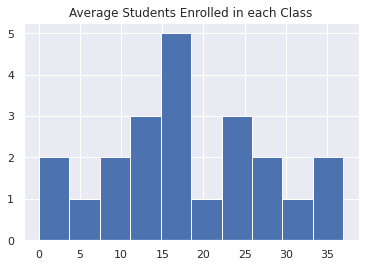

In [ ]:
plt.hist(df_x_clean.groupby('Class Number')['Average Students Enrolled'].first())
plt.title("Average Students Enrolled in each Class")
plt.show()

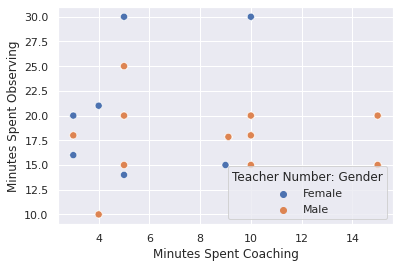

In [ ]:
sns.scatterplot(df_x_clean['Minutes Spent Coaching'],df_x_clean['Minutes Spent Observing'],s=50,hue=df_x_clean['Teacher Number: Gender'])

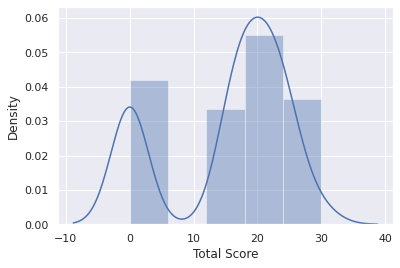

In [ ]:
sns.distplot(df_x_clean['Total Score'])

In [ ]:
df_x_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 14 to 997
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Grade_x                                                  349 non-null    object 
 1   School Year_x                                            349 non-null    object 
 2   Date of Test                                             349 non-null    object 
 3   Pre or Post?                                             349 non-null    object 
 4   Main Language Used In Exam                               349 non-null    object 
 5   EGRA Question 1: Reading Habit                           349 non-null    object 
 6   EGRA Last Book Read                                      349 non-null    object 
 7   Reads With Others                                        349 non-null    int64  
 8   How Often, ReadsWithOthers   

1. Create a match between the teacher data and Student data
  - what join key
2. Clean the Data
  - fillna
  - striping unwanted values
  - creating new cal columns
  - One hot encoding - desirable
  - normalization -desirable
3. Models
  - Teacher score analysis - student performance vs teacher,student feature except skills
  - skill analysis - student performance vs skill analysis
  - course effectiveness - teacher performance vs school years in the program

In [ ]:
# plt.hist(df_x_clean.groupby('Teacher Number: Teacher Number')['Teacher Number: School Years in Teacher Support Program'].first())
# plt.title("School Years in Teacher Support Program")
# plt.xticks(range(6))
# plt.xlabel('Year')
# plt.show()

Meeting
- Comprehenseive score different needed?
- how can we handle diff units points/min points

**Teacher score analysis - student performance vs teacher,student feature except skills** by wenxi chen
- eg: https://machinelearningmastery.com/calculate-feature-importance-with-python/
- Normalizing+one-hotcoding
- EDA in combination

**skill analysis - student performance vs skill analysis**
- Linear regression 
- one hot encoding mandotary\
EDA
- EDA 2 plots section 1 total score vs skill1

**course effectiveness - teacher performance vs school years in the program**
Linear regression - school years+ when we add others how is it working out

EDA plots


COMPRHENSIVE Test
STUDENT - Wenxi + Jane
SKILL - George
COURSE - Zoe

EDA - Sydney + Jane
PPT - 5
FORMAT-


In [ ]:
df_target['EGRA Section 6 Total Score']

14     8
16     6
18     8
20     7
22     6
      ..
989    5
991    6
993    7
995    6
997    8
Name: EGRA Section 6 Total Score, Length: 349, dtype: int64

In [ ]:
df_target['EGRA Section 5 CWPM']

14     133
16      77
18     105
20      79
22      68
      ... 
989     80
991     94
993     75
995    120
997    124
Name: EGRA Section 5 CWPM, Length: 349, dtype: int64

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [ ]:
df_x_clean

,Grade_x,School Year_x,Date of Test,Pre or Post?,Main Language Used In Exam,EGRA Question 1: Reading Habit,EGRA Last Book Read,Reads With Others,"How Often, ReadsWithOthers",Student Gender,...,Skill to Improve 1,Skill to Improve 2,Minutes Spent Observing,Minutes Spent Coaching,Total Score,Teacher Number: Gender,Teacher Number: School Years in Teacher Support Program,Teacher Present,Average Students Enrolled,School Year_y
14,5,2020-2021,11/24/2021,Post,English,Yes,Yes,1,1,Male,...,None,None,17.846743,9.114943,0,Female,3,Not Present,15,2020-2021
16,5,2020-2021,11/24/2021,Post,English,Yes,Yes,1,1,Female,...,None,None,17.846743,9.114943,0,Female,3,Not Present,15,2020-2021
18,5,2020-2021,11/24/2021,Post,English,Yes,Yes,1,2,Female,...,None,None,17.846743,9.114943,0,Female,3,Not Present,15,2020-2021
20,5,2020-2021,11/24/2021,Post,English; Ewe,Yes,Yes,1,3,Female,...,None,None,17.846743,9.114943,0,Female,3,Not Present,15,2020-2021
22,5,2020-2021,11/24/2021,Post,English; Ewe,Yes,Yes,1,1,Female,...,None,None,17.846743,9.114943,0,Female,3,Not Present,15,2020-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,5,2020-2021,11/26/2021,Post,English; Ewe,No,No,0,0,Male,...,None,None,17.846743,9.114943,0,Male,3,Not Present,17,2020-2021
991,5,2020-2021,11/26/2021,Post,English,Yes,Yes,1,3,Female,...,None,None,17.846743,9.114943,0,Male,3,Not Present,17,2020-2021
993,5,2020-2021,11/26/2021,Post,English; Ewe,No,Yes,1,2,Male,...,None,None,17.846743,9.114943,0,Male,3,Not Present,17,2020-2021
995,5,2020-2021,11/26/2021,Post,English; Ewe,Yes,Yes,1,3,Male,...,None,None,17.846743,9.114943,0,Male,3,Not Present,17,2020-2021


In [ ]:
df_target['Cumulative Score'] = df_target['EGRA Section 1 Total Score']*33.3333 + df_target['EGRA Section 2a Score']*2 + df_target['EGRA Section 2b Score'] * 10 + df_target['EGRA Section 3 Letters Correct'] + df_target['EGRA Section 4 Words Correct'] * 2 + df_target['EGRA Section 5 Words Correct'] * 3 + df_target['EGRA Section 5 Questions Correct'] * 15 + df_target["EGRA Section 6 Total Score"]*12.5 + df_target["EGRA Section 7a Score"] *25

In [ ]:
df_target['Cumulative Score'] 

14     1015.9999
16      890.9999
18      846.6666
20      826.1666
22      795.6666
         ...    
989     851.8333
991     903.9999
993     902.4999
995    1004.9999
997    1010.9999
Name: Cumulative Score, Length: 349, dtype: float64

In [ ]:
df_target.head(5)

,EGRA Section 1a Score,EGRA Section 1b Score,EGRA Section 1c Score,EGRA Section 2a Score,EGRA Section 2b Score,EGRA Section 3 Letters Correct,EGRA Section 3 Time Completed,EGRA Section 3 LPM,EGRA Section 4 Words Correct,EGRA Section 4 Time Completed,...,EGRA Section 5 CWPM,EGRA Section 5 Questions Correct,EGRA Section 6 Written Words Correct,EGRA Section 6 Correct Space/Direction,EGRA Section 6 Correct Punctuation,EGRA Section 6 Correct Use of Capitals,EGRA Section 7a Score,EGRA Section 1 Total Score,EGRA Section 6 Total Score,Cumulative Score
14,1,1,1,48,9,100,55.0,109.0,50,37.0,...,133,10,4,2,1,1,4,3,8,1015.9999
16,1,1,1,35,8,92,60.0,92.0,45,48.0,...,77,9,3,2,0,1,3,3,6,890.9999
18,1,0,1,24,8,57,60.0,57.0,43,53.0,...,105,9,4,2,1,1,4,2,8,846.6666
20,1,1,0,22,6,86,60.0,86.0,49,49.0,...,79,9,4,2,0,1,3,2,7,826.1666
22,1,1,0,16,10,67,60.0,67.0,29,60.0,...,68,8,3,2,0,1,4,2,6,795.6666


In [ ]:
df_x_clean.head()

,Grade_x,School Year_x,Date of Test,Pre or Post?,Main Language Used In Exam,EGRA Question 1: Reading Habit,EGRA Last Book Read,Reads With Others,"How Often, ReadsWithOthers",Student Gender,...,Skill to Improve 1,Skill to Improve 2,Minutes Spent Observing,Minutes Spent Coaching,Total Score,Teacher Number: Gender,Teacher Number: School Years in Teacher Support Program,Teacher Present,Average Students Enrolled,School Year_y
14,5,2020-2021,11/24/2021,Post,English,Yes,Yes,1,1,Male,...,None,None,17.846743,9.114943,0,Female,3,Not Present,15,2020-2021
16,5,2020-2021,11/24/2021,Post,English,Yes,Yes,1,1,Female,...,None,None,17.846743,9.114943,0,Female,3,Not Present,15,2020-2021
18,5,2020-2021,11/24/2021,Post,English,Yes,Yes,1,2,Female,...,None,None,17.846743,9.114943,0,Female,3,Not Present,15,2020-2021
20,5,2020-2021,11/24/2021,Post,English; Ewe,Yes,Yes,1,3,Female,...,None,None,17.846743,9.114943,0,Female,3,Not Present,15,2020-2021
22,5,2020-2021,11/24/2021,Post,English; Ewe,Yes,Yes,1,1,Female,...,None,None,17.846743,9.114943,0,Female,3,Not Present,15,2020-2021


In [ ]:
df_x_clean['Pre or Post?'].value_counts()

Post    348
Pre       1
Name: Pre or Post?, dtype: int64

In [ ]:
df_x_clean.columns

Index(['Grade_x', 'School Year_x', 'Date of Test', 'Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 'Class Number',
       'Teacher Number: Teacher Number', 'Date', 'Q1 Rating or Answer',
       'Q2 Rating', 'Q3 Rating or Answer', 'Q4 Rating or Answer',
       'Q5 Rating or Answer', 'Q6 Rating or Answer', 'Q7 Rating', 'Q8 Rating',
       'Skill to Improve 1', 'Skill to Improve 2', 'Minutes Spent Observing',
       'Minutes Spent Coaching', 'Total Score', 'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present', 'Average Students Enrolled', 'School Year_y'],
      dtype='object')

In [ ]:
df_x_clean['School Year_y']

14     2020-2021
16     2020-2021
18     2020-2021
20     2020-2021
22     2020-2021
         ...    
989    2020-2021
991    2020-2021
993    2020-2021
995    2020-2021
997    2020-2021
Name: School Year_y, Length: 349, dtype: object

In [ ]:
df_x_clean['Teacher Present'].unique()

array(['Not Present', 'Present'], dtype=object)

In [ ]:
df_x_clean['Teacher Present'] = df_x_clean['Teacher Present'].map({
    "Present":1,
    "Not Present":0
})

In [ ]:
df_x_clean['Teacher Number: Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df_x_clean['Teacher Number: Gender'] = df_x_clean['Teacher Number: Gender'].map({
    "Male":1,
    "Female":0
})

In [ ]:
df_x_clean['Student Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df_x_clean['Student Gender'] = df_x_clean['Student Gender'].map({
    "Male":1,
    "Female":0
})

In [ ]:
df_x_clean['EGRA Last Book Read'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df_x_clean['EGRA Last Book Read'] = df_x_clean['EGRA Last Book Read'].map({
    "Yes":1,
    "No":0
})

In [ ]:
df_x_clean['EGRA Question 1: Reading Habit'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df_x_clean['EGRA Question 1: Reading Habit'] = df_x_clean['EGRA Question 1: Reading Habit'].map({
    "Yes":1,
    "No":0
})

In [ ]:
df_x_clean=df_x_clean.drop(labels=['Date of Test','Class Number',
       'Teacher Number: Teacher Number', 'Date','School Year_y'],axis=1)

In [ ]:
df_x_clean['Main Language Used In Exam'].unique()

array(['English', 'English; Ewe', 'Ewe'], dtype=object)

In [ ]:
df_x_clean['Main Language Used In Exam'] = df_x_clean['Main Language Used In Exam'].map({
    "Ewe": 1,
    "English": 2,
    "English; Ewe": 3
})

In [ ]:
len(df_x_clean.columns)

26

### Encode to multiple categories

In [ ]:
df_x_clean['School Year_x'].unique()

array(['2020-2021', '2018-2019', '2019-2020'], dtype=object)

In [ ]:
df_x_clean["School Year_x"] = df_x_clean["School Year_x"].map({
    "2019-2020": 2020,
    "2020-2021": 2021,
    "2018-2019": 2019
})

In [ ]:
df_x_clean["School Year_x"].unique()

array([2021, 2019, 2020])

In [ ]:
df_x_clean['Pre or Post?'] = df_x_clean['Pre or Post?'].map({
   "Pre":0,
   "Post":1 
})

In [ ]:
df_x_clean['Pre or Post?'] 

14     1
16     1
18     1
20     1
22     1
      ..
989    1
991    1
993    1
995    1
997    1
Name: Pre or Post?, Length: 349, dtype: int64

In [ ]:
matched_clean=pd.concat([df_target,df_x_clean],axis=1)

In [ ]:
matched_clean.to_csv("Matched Clean.csv")

In [ ]:
df_target.to_csv("Target_Pop.csv")

In [ ]:
df_x_clean.to_csv("Feature_Pop.csv")

In [ ]:
df_target

,EGRA Section 1a Score,EGRA Section 1b Score,EGRA Section 1c Score,EGRA Section 2a Score,EGRA Section 2b Score,EGRA Section 3 Letters Correct,EGRA Section 3 Time Completed,EGRA Section 3 LPM,EGRA Section 4 Words Correct,EGRA Section 4 Time Completed,...,EGRA Section 5 CWPM,EGRA Section 5 Questions Correct,EGRA Section 6 Written Words Correct,EGRA Section 6 Correct Space/Direction,EGRA Section 6 Correct Punctuation,EGRA Section 6 Correct Use of Capitals,EGRA Section 7a Score,EGRA Section 1 Total Score,EGRA Section 6 Total Score,Cumulative Score
14,1,1,1,48,9,100,55.0,109.0,50,37.0,...,133,10,4,2,1,1,4,3,8,1015.9999
16,1,1,1,35,8,92,60.0,92.0,45,48.0,...,77,9,3,2,0,1,3,3,6,890.9999
18,1,0,1,24,8,57,60.0,57.0,43,53.0,...,105,9,4,2,1,1,4,2,8,846.6666
20,1,1,0,22,6,86,60.0,86.0,49,49.0,...,79,9,4,2,0,1,3,2,7,826.1666
22,1,1,0,16,10,67,60.0,67.0,29,60.0,...,68,8,3,2,0,1,4,2,6,795.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1,0,0,20,9,100,55.0,109.0,48,60.0,...,80,10,2,2,1,0,4,1,5,851.8333
991,1,1,1,31,7,81,60.0,81.0,46,48.0,...,94,10,3,2,1,0,4,3,6,903.9999
993,1,1,1,11,9,81,60.0,81.0,46,59.0,...,75,10,4,2,0,1,4,3,7,902.4999
995,1,1,1,50,10,100,56.0,107.0,50,36.0,...,120,10,3,2,0,1,4,3,6,1004.9999


In [ ]:
df_target

,EGRA Section 1a Score,EGRA Section 1b Score,EGRA Section 1c Score,EGRA Section 2a Score,EGRA Section 2b Score,EGRA Section 3 Letters Correct,EGRA Section 3 Time Completed,EGRA Section 3 LPM,EGRA Section 4 Words Correct,EGRA Section 4 Time Completed,...,EGRA Section 5 CWPM,EGRA Section 5 Questions Correct,EGRA Section 6 Written Words Correct,EGRA Section 6 Correct Space/Direction,EGRA Section 6 Correct Punctuation,EGRA Section 6 Correct Use of Capitals,EGRA Section 7a Score,EGRA Section 1 Total Score,EGRA Section 6 Total Score,Cumulative Score
14,1,1,1,48,9,100,55.0,109.0,50,37.0,...,133,10,4,2,1,1,4,3,8,1015.9999
16,1,1,1,35,8,92,60.0,92.0,45,48.0,...,77,9,3,2,0,1,3,3,6,890.9999
18,1,0,1,24,8,57,60.0,57.0,43,53.0,...,105,9,4,2,1,1,4,2,8,846.6666
20,1,1,0,22,6,86,60.0,86.0,49,49.0,...,79,9,4,2,0,1,3,2,7,826.1666
22,1,1,0,16,10,67,60.0,67.0,29,60.0,...,68,8,3,2,0,1,4,2,6,795.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1,0,0,20,9,100,55.0,109.0,48,60.0,...,80,10,2,2,1,0,4,1,5,851.8333
991,1,1,1,31,7,81,60.0,81.0,46,48.0,...,94,10,3,2,1,0,4,3,6,903.9999
993,1,1,1,11,9,81,60.0,81.0,46,59.0,...,75,10,4,2,0,1,4,3,7,902.4999
995,1,1,1,50,10,100,56.0,107.0,50,36.0,...,120,10,3,2,0,1,4,3,6,1004.9999
